In [6]:
'''
【课程3.2.2】  线性回归的python实现方法

线性回归通常是人们在学习预测模型时首选的技术之一。在这种技术中，因变量是连续的，自变量可以是连续的也可以是离散的，回归线的性质是线性的。
线性回归使用最佳的拟合直线（也就是回归线）在因变量（Y）和一个或多个自变量（X）之间建立一种关系

简单线性回归 / 多元线性回归 

'''

'\n【课程3.2.2】  线性回归的python实现方法\n\n线性回归通常是人们在学习预测模型时首选的技术之一。在这种技术中，因变量是连续的，自变量可以是连续的也可以是离散的，回归线的性质是线性的。\n线性回归使用最佳的拟合直线（也就是回归线）在因变量（Y）和一个或多个自变量（X）之间建立一种关系\n\n简单线性回归 / 多元线性回归 \n\n'

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

%matplotlib inline

Text(0.5, 1.0, '线性回归拟合')

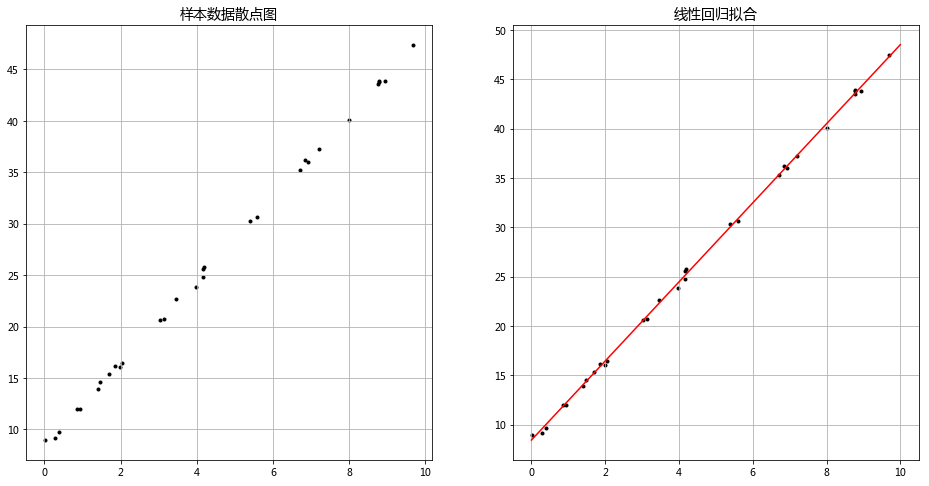

In [2]:
# 简单线性回归（一元线性回归）
# （1）数据示例

from sklearn.linear_model import LinearRegression
# 导入线性回归模块

rng = np.random.RandomState(1)
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30)
# np.random.RandomState → 随机数种子，对于一个随机数发生器，只要该种子（seed）相同，产生的随机数序列就是相同的
# 生成随机数据x与y
# 样本关系：y = 8 + 4*x

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
plt.scatter(xtrain,ytrain,marker='.',color = 'k')
plt.grid()
plt.title('样本数据散点图',fontsize = 14)
# 生成散点图

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
# LinearRegression → 线性回归评估器，用于拟合数据得到拟合直线
# model.fit(x,y) → 拟合直线，参数分别为x与y
# x[:,np.newaxis] → 将数组变成(n,1)形状

xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])
# 创建测试数据xtest，并根据拟合曲线求出ytest
# model.predict → 预测

ax2 = fig.add_subplot(1,2,2)
plt.scatter(xtrain,ytrain,marker = '.',color = 'k')
plt.plot(xtest,ytest,color = 'red')
plt.grid()
plt.title('线性回归拟合',fontsize = 14)
# 绘制散点图、线性回归拟合直线

Text(0.5, 1.0, '误差')

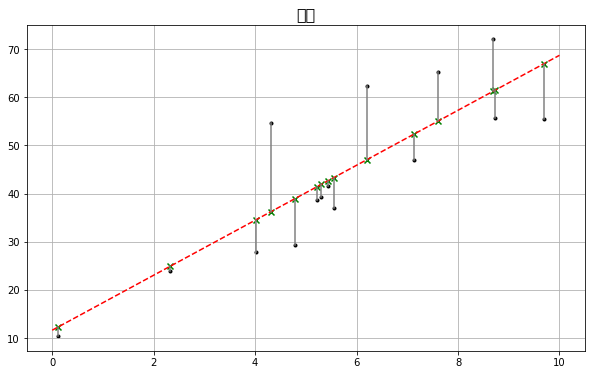

In [9]:
# 简单线性回归（一元线性回归）
# （2）误差

rng = np.random.RandomState(8)
xtrain = 10 * rng.rand(15)
ytrain = 8 + 4 * xtrain + rng.rand(15) * 30
model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])
# 创建样本数据并进行拟合

plt.figure(figsize = (10,6))
plt.scatter(xtrain,ytrain,color = 'k',marker = '.')
plt.plot(xtest,ytest,linestyle = '--',color = 'red')
ytest2 = model.predict(xtrain[:,np.newaxis])
plt.scatter(xtrain,ytest2,marker = 'x',color = 'g')
plt.plot([xtrain,xtrain],[ytrain,ytest2],color = 'gray')
plt.grid()
plt.title('误差',fontsize = 16)
# 绘制图表

In [10]:
# 简单线性回归（一元线性回归）
# （3）求解a，b

rng = np.random.RandomState(1)
xtrain = rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30)

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
print('斜率a为：%.4f'%model.coef_[0])
print('截距b为：%.4f'%model.intercept_)
print('线性回归函数为:\ny = %.4fx + %.4f'%(model.coef_[0],model.intercept_))
# 参数输出

斜率a为：4.0448
截距b为：8.4477
线性回归函数为:
y = 4.0448x + 8.4477


         b1        b2        b3        b4          y
0  0.221993  0.870732  0.206719  0.918611  14.003410
1  0.488411  0.611744  0.765908  0.518418  10.447727
2  0.296801  0.187721  0.080741  0.738440  12.712999
3  0.441309  0.158310  0.879937  0.274086   8.281095
4  0.414235  0.296080  0.628788  0.579838  10.437874
斜率a为： [ 1.5  2.  -4.   3. ]
截距b为：10.0
线性回归函数为:
y = 1.5x1 + 2.0x2 + -4.0x3 + 3.0x4 + 10.0


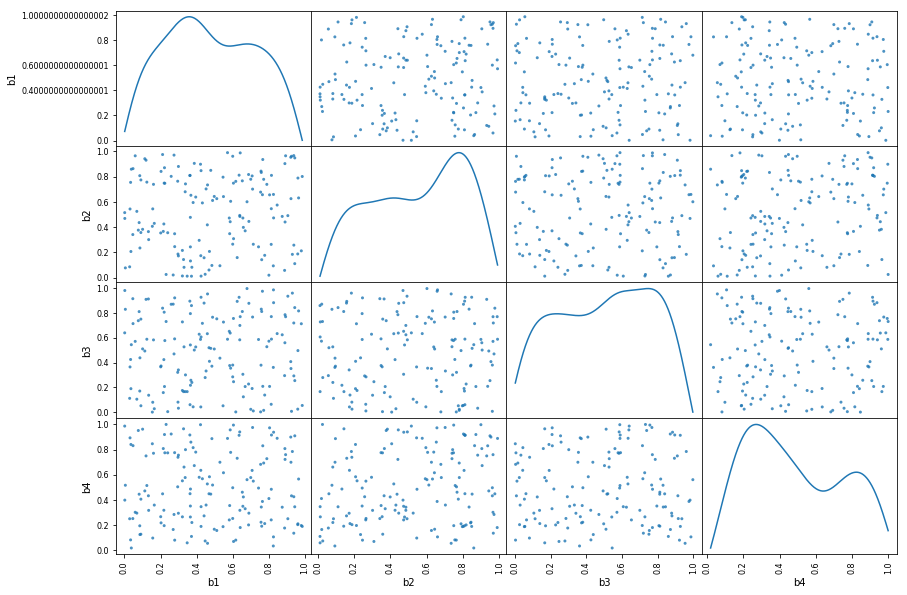

In [11]:
# 多元线性回归

from pandas import plotting
rng = np.random.RandomState(5)
xtrain = rng.rand(150,4)
ytrain = 10 + np.dot(xtrain,[1.5,2,-4,3])
df = pd.DataFrame(xtrain,columns=['b1','b2','b3','b4'])
df['y'] = ytrain
plotting.scatter_matrix(df[['b1','b2','b3','b4']],figsize = (14,10),diagonal = 'kde',alpha = 0.8,range_padding = 0.1)
print(df.head())
# 创建数据，其中包括4个自变量
# 4个变量相互独立

model = LinearRegression()
model.fit(df[['b1','b2','b3','b4']],df['y'])
# 多元回归拟合

print('斜率a为：',model.coef_)
print('截距b为：%.1f'%model.intercept_)
print('线性回归函数为:\ny = %.1fx1 + %.1fx2 + %.1fx3 + %.1fx4 + %.1f'
      %(model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.intercept_))
# 参数输出

In [12]:
'''
【课程3.2.3】  线性回归模型评估

通过几个参数验证回归模型

SSE(和方差、误差平方和)：The sum of squares due to error
MSE(均方差、方差)：Mean squared error
RMSE(均方根、标准差)：Root mean squared error
R-square(确定系数) Coefficient of determination

'''

'\n【课程3.2.3】  线性回归模型评估\n\n通过几个参数验证回归模型\n\nSSE(和方差、误差平方和)：The sum of squares due to error\nMSE(均方差、方差)：Mean squared error\nRMSE(均方根、标准差)：Root mean squared error\nR-square(确定系数) Coefficient of determination\n\n'

In [13]:
# 模型评价
# MSE, RMES, R-square

from sklearn import metrics

rng = np.random.RandomState(1)
xtrain = rng.rand(30) * 10
ytrain = 8 + 4 * xtrain + 3 * rng.rand(30)
# 创建数据

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
# 多元回归拟合

ytest = model.predict(xtrain[:,np.newaxis])        # 求出预测数据
mse = metrics.mean_squared_error(ytrain,ytest)     # 求出均方差
rmse = np.sqrt(mse)                                # 求出均方根

ssr = ((ytest - ytrain.mean())**2).sum()  # 求出预测数据与原始数据均值之差的平方和
sst = ((ytrain - ytrain.mean())**2).sum()  # 求出原始数据和均值之差的平方和
r2 = ssr / sst # 求出确定系数

r = model.score(xtrain[:,np.newaxis],ytrain)     # 求出确定系数
print('均方差MSE为:%.5f'%ssr)
print('均方根RMSE为：%.5f'%sst)
print('确定系数R-square为:%.5f'%r)
# 确定系数R-square非常接近于1，线性回归模型拟合较好

均方差MSE为:4372.75292
均方根RMSE为：4396.29412
确定系数R-square为:0.99465


In [14]:
'''
【课程3.3.2】  最邻近分类的python实现方法

在距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别

电影分类 / 植物分类

'''

'\n【课程3.3.2】  最邻近分类的python实现方法\n\n在距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别\n\n电影分类 / 植物分类\n\n'

      name  fight  kiss     type
0  北京遇上西雅图      3   104  Romance
1      喜欢你      2   100  Romance
2    疯狂动物城      1    81  Romance
3      战狼2    101    10   Action
4       力王     99     5   Action
5      敢死队     98     2   Action
-----------------------------------------
预测电影类型为： ['Romance']


Text(18, 90, '《你的名字》')

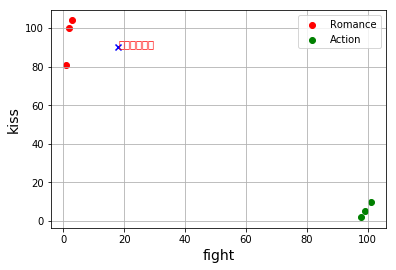

In [15]:
#  案例一：电影数据分类

from sklearn import neighbors

data = pd.DataFrame({'name':['北京遇上西雅图','喜欢你','疯狂动物城','战狼2','力王','敢死队'],
                    'fight':[3,2,1,101,99,98],
                    'kiss':[104,100,81,10,5,2],
                    'type':['Romance','Romance','Romance','Action','Action','Action']})
print(data)
print('-----------------------------------------')
# 创建数据

knn = neighbors.KNeighborsClassifier()
knn.fit(data[['fight','kiss']],data['type'])
print('预测电影类型为：',knn.predict([[18,90]]))
# 加载数据，构建KNN分类模型
# 预测未知数据

plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type'] == 'Romance']['kiss'],color = 'red',marker='o',label = 'Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type'] == 'Action']['kiss'],color = 'green',marker = 'o',label = 'Action')
plt.legend()
plt.grid()
plt.scatter(18,90,color = 'b',marker = 'x',label = 'Romance')
plt.xlabel('fight',fontsize = 14)
plt.ylabel('kiss',fontsize = 14)
plt.text(18,90,'《你的名字》',color = 'red')
# 绘制图表

,fight,kiss,type
0,42.868077,41.738876,Action
1,134.262066,19.634153,Action
2,41.917240,16.355953,Action
3,-107.758130,84.662397,Romance
4,-47.888939,15.864501,Romance


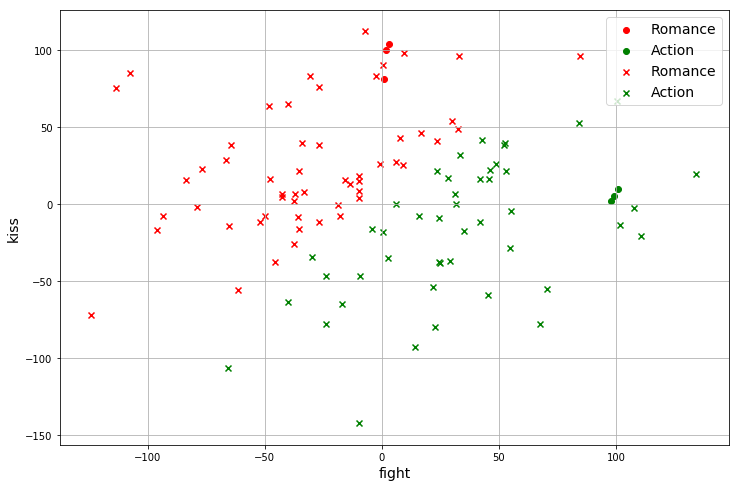

In [16]:
# 案例一：电影分类
# 给随机数据进行模拟预测

data2 = pd.DataFrame(np.random.randn(100,2)*50,columns=['fight','kiss'])
data2['type'] = knn.predict(data2)
plt.figure(figsize = (12,8))
plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type'] == 'Romance']['kiss'],color = 'red',marker='o',label = 'Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type'] == 'Action']['kiss'],color = 'green',marker = 'o',label = 'Action')
plt.grid()
plt.scatter(data2[data2['type'] == 'Romance']['fight'],data2[data2['type'] == 'Romance']['kiss'],color = 'red',marker='x',label = 'Romance')
plt.scatter(data2[data2['type'] == 'Action']['fight'],data2[data2['type'] == 'Action']['kiss'],color = 'green',marker = 'x',label = 'Action')
plt.legend(loc = 'upper right',fontsize = 14)
plt.xlabel('fight',fontsize = 14)
plt.ylabel('kiss',fontsize = 14)
# 绘制图表
data2.head()

In [17]:
# 案例二：植物分类

from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())
print('数据长度为%i条'%len(iris['data']))

print('feature_names: ',iris.feature_names)
print('target_names: ',iris.target_names)
print(iris.data[:5])
# 150个实例数据
# feature_names - 特征分类：萼片长度，萼片宽度，花瓣长度，花瓣宽度  → sepal length, sepal width, petal length, petal width
# 目标类别：Iris setosa, Iris versicolor, Iris virginica. 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
数据长度为150条
feature_names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names:  ['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
# 案例二：植物分类

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
ty = pd.DataFrame({'target':[0,1,2],
                  'target_names':iris.target_names})
df = pd.merge(df,ty,on = 'target')
# 数据转换

knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data,df['target_names'])
# 建立分类模型

pre_data = [[0.1, 0.2, 0.3, 0.4]]
print('预测结果为:',knn.predict(pre_data))
# 预测结果

df.head()

预测结果为: ['setosa']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
'''
【课程3.4.2】  PCA主成分分析的python实现方法

最广泛无监督算法 + 基础的降维算法
通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量 → 高维数据的降维

二维数据降维 / 多维数据降维 

'''

'\n【课程3.4.2】  PCA主成分分析的python实现方法\n\n最广泛无监督算法 + 基础的降维算法\n通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量 → 高维数据的降维\n\n二维数据降维 / 多维数据降维 \n\n'

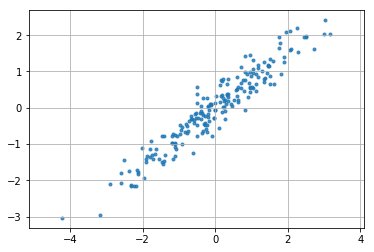

In [20]:
# 二维数据降维
# 数据创建

rng = np.random.RandomState(8)
data = np.dot(rng.rand(2,2),rng.randn(2,200)).T
df = pd.DataFrame({'X1':data[:,0],
                  'X2':data[:,1]})
plt.scatter(df['X1'],df['X2'],alpha = 0.8,marker = '.')
plt.axis('equal')
plt.grid()
# 生成图表

[2.79699086]
[[-0.7788006  -0.62727158]]
1
--------------------------------
original shape:  (200, 2)
transformed shape:  (200, 1)
[[ 1.77885258]
 [ 1.8656813 ]
 [ 3.14560277]
 [-1.67114513]
 [-2.41849842]]
-------------------------------


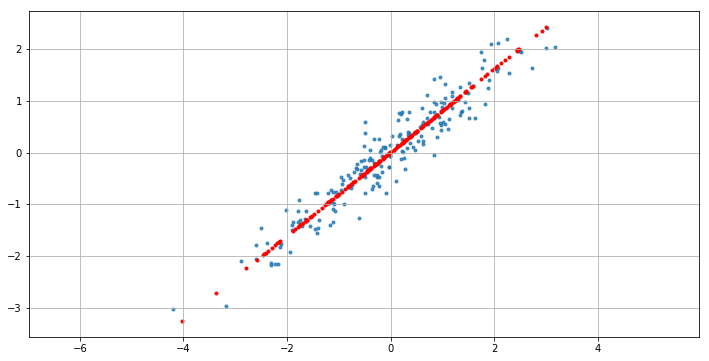

In [21]:
# 二维数据降维
# 构建模型，分析主成分

from sklearn.decomposition import PCA
# 加载主成分分析模块PCA

pca = PCA(n_components=1)       # n_components = 1 → 降为1维
pca.fit(df)         # 构建模型
# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)  
# n_components:  PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
# copy: True或者False，默认为True → 表示是否在运行算法时，将原始训练数据复制一份
# fit(X,y=None) → 调用fit方法的对象本身。比如pca.fit(X)，表示用X对pca这个对象进行训练

print(pca.explained_variance_)     # 输出特征值
print(pca.components_)             # 输出特征向量
print(pca.n_components)            # 输出成分的个数
print('--------------------------------')
# components_：返回具有最大方差的成分。
# explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
# n_components_：返回所保留的成分个数n。

# 这里是shape(200,2)降为shape(200,1)，只有1个特征值，对应2个特征向量
# 降维后主成分 A1 = 0.7788006 * X1 + 0.62727158 * X2

x_pca = pca.transform(df)               # 数据转换
x_new = pca.inverse_transform(x_pca)    # 将降维后的数据转换成原始数据
print('original shape: ',df.shape)
print('transformed shape: ',x_pca.shape)
print(x_pca[:5])
print('-------------------------------')
# 主成分分析，生成新的向量x_pca
# fit_transform(X) → 用X来训练PCA模型，同时返回降维后的数据，这里x_pca就是降维后的数据
# inverse_transform() → 将降维后的数据转换成原始数据
plt.figure(figsize = (12,6))
plt.scatter(df['X1'],df['X2'],marker = '.',alpha = 0.8)
plt.scatter(x_new[:,0],x_new[:,1],marker = '.',color = 'red')
plt.axis('equal')
plt.grid()
# 生成图表

In [22]:
# 多维数据降维 
# 加载数据

from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())
print('数据长度为%i条'%len(digits['data']))
print('数据形状为：',digits.data.shape)
print(digits.data[:2])

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
数据长度为1797条
数据形状为： (1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]


original shape:  (1797, 64)
projected shape:  (1797, 2)
[179.0069301  163.71774688]
(2, 64)


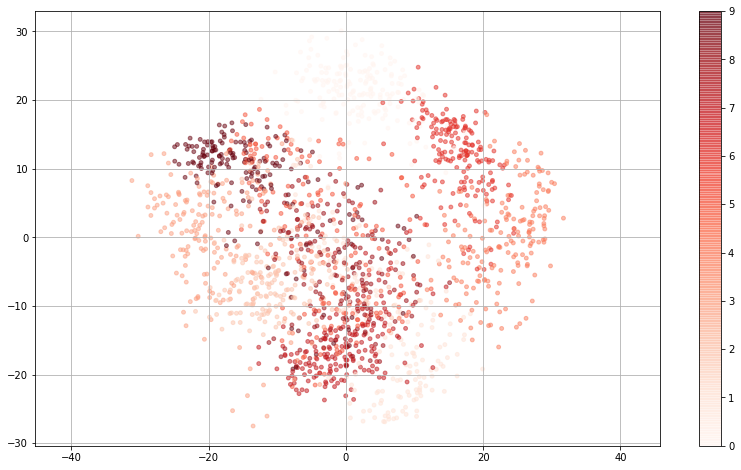

In [23]:
# 多维数据降维 
# 构建模型，分析主成分

pca = PCA(n_components=2)    # 降为2纬
projected = pca.fit_transform(digits.data)
print('original shape: ',digits.data.shape)
print('projected shape: ',projected.shape)
print(pca.explained_variance_)          # 输出特征值
print(pca.components_.shape)            # 输出特征向量形状
# 降维后，得到2个成分，每个成分有64个特征向量

plt.figure(figsize = (14,8))
plt.scatter(projected[:,0],projected[:,1],c = digits.target,cmap = 'Reds',s = 15,alpha = 0.5)
plt.axis('equal')
plt.grid()
plt.colorbar()
# 二维数据制图

original shape:  (1797, 64)
projected shape: , (1797, 10)
[179.00693007 163.71774688 141.78843907 101.10037495  69.51314408
  59.10850943  51.88437584  44.01501591  40.31087175  37.01155762]
(10, 64)


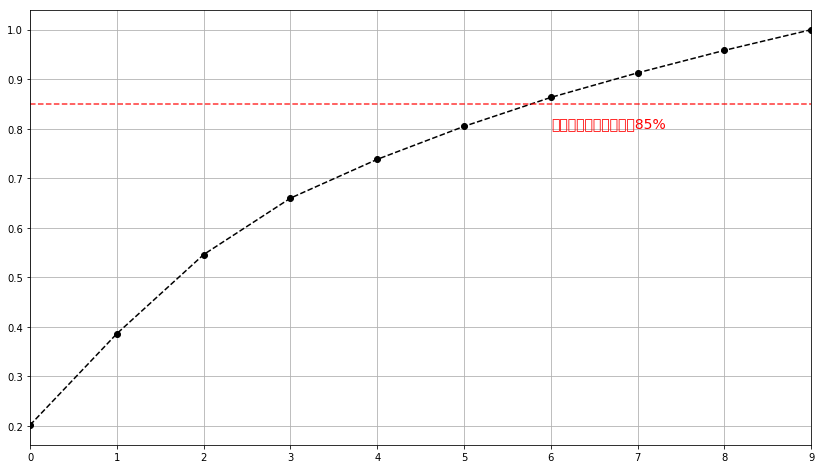

In [24]:
# 多维数据降维 
# 主成分筛选

pca = PCA(n_components=10)
projected = pca.fit_transform(digits.data)
print('original shape: ',digits.data.shape)
print('projected shape: ,',projected.shape)
print(pca.explained_variance_)       # 输出特征值
print(pca.components_.shape)  # 输出特征向量形状
#print(projected)  # 输出解析后数据
# 降维后，得到10个成分，每个成分有64个特征向量

c_s = pd.DataFrame({'b':pca.explained_variance_,
                   'b_sum':pca.explained_variance_.cumsum() / pca.explained_variance_.sum()})
# 做贡献率累计求和
# 可以看到第7个成分时候，贡献率超过85% → 选取前7个成分作为主成分

c_s['b_sum'].plot(figsize = (14,8),style = '--ko')
plt.axhline(0.85,linestyle = '--',color = 'red',alpha = 0.8)
plt.text(6,c_s['b_sum'].iloc[6]-0.06,'第七个累计贡献率超过85%',color = 'red',fontsize = 14)
plt.grid()

In [25]:
'''
【课程3.4.3】  K-means聚类的python实现方法

最常用的机器学习聚类算法，且为典型的基于距离的聚类算法
K均值： 基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇
以欧式距离作为相似度测度

'''

'\n【课程3.4.3】  K-means聚类的python实现方法\n\n最常用的机器学习聚类算法，且为典型的基于距离的聚类算法\nK均值： 基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇\n以欧式距离作为相似度测度\n\n'

[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]]
[1 3 0 3 1]


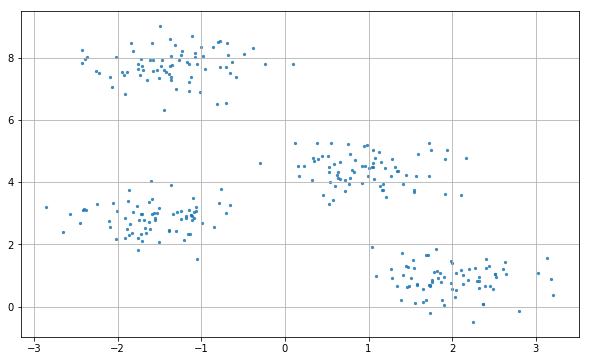

In [26]:
# 创建数据

from sklearn.datasets.samples_generator import make_blobs
# make_blobs聚类数据生成器

x,y_true = make_blobs(n_samples = 300,         # 生成300条数据
                     centers = 4,               # 四类数据
                     cluster_std = 0.5,        # 方差一致，可传入列表分别指定值，表示离散程度
                     random_state = 0,
                     n_features = 2)
print(x[:5])
print(y_true[:5])
# n_samples → 待生成的样本的总数。
# n_features → 每个样本的特征数。
# centers → 类别数
# cluster_std → 每个类别的方差，如多类数据不同方差，可设置为[1.0,3.0]（这里针对2类数据）
# random_state → 随机数种子
# x → 生成数据值， y → 生成数据对应的类别标签

plt.figure(figsize = (10,6))
plt.scatter(x[:,0],x[:,1],marker = '.',s = 20,alpha = 0.8)
plt.grid()
# 绘制图表

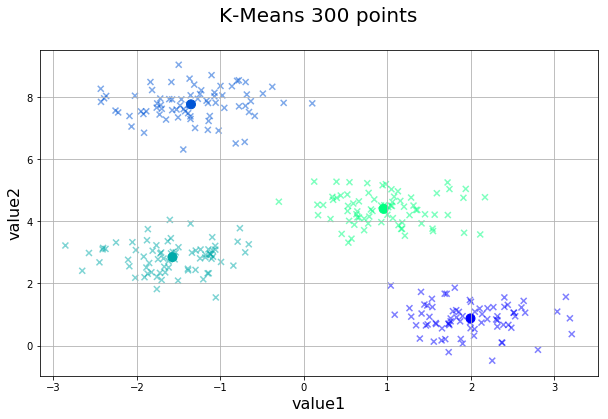

In [27]:
# 构建K均值模型

from sklearn.cluster import KMeans
# 导入模块

kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_means = kmeans.predict(x)
centriods = kmeans.cluster_centers_
# 构建模型，并预测出样本的类别y_kmeans
# kmeans.cluster_centers_：得到不同簇的中心点

plt.figure(figsize = (10,6))
plt.scatter(x[:,0],x[:,1],c = y_means,cmap='winter',marker = 'x',alpha = 0.5)
plt.scatter(centriods[:,0],centriods[:,1],c = [0,1,2,3],marker = 'o',cmap = 'winter',s= 80)
plt.title('K-Means 300 points\n',fontsize = 20)
plt.xlabel('value1',fontsize = 16)
plt.ylabel('value2',fontsize = 16)
plt.grid()
# 绘制图表

In [28]:
'''
【课程3.5】  蒙特卡罗模拟

蒙特卡罗（Monte Carlo）方法，又称随机抽样或统计试验方法，是以概率和统计理论方法为基础的一种计算方法
使用随机数（或更常见的伪随机数）来解决很多计算问题的方法。
将所求解的问题同一定的概率模型相联系，用电子计算机实现统计模拟或抽样，以获得问题的近似解。
 
① π的计算
② 计算积分 y = x**2
③ 排队上厕所问题

'''

'\n【课程3.5】  蒙特卡罗模拟\n\n蒙特卡罗（Monte Carlo）方法，又称随机抽样或统计试验方法，是以概率和统计理论方法为基础的一种计算方法\n使用随机数（或更常见的伪随机数）来解决很多计算问题的方法。\n将所求解的问题同一定的概率模型相联系，用电子计算机实现统计模拟或抽样，以获得问题的近似解。\n \n① π的计算\n② 计算积分 y = x**2\n③ 排队上厕所问题\n\n'

pi的值为：  3.1996


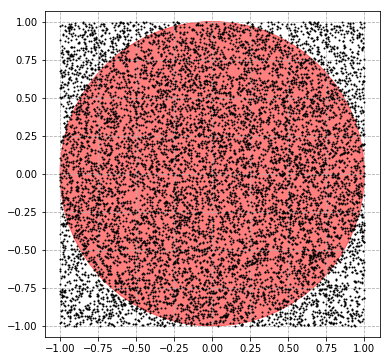

In [29]:
# π的计算
from matplotlib.patches import Circle

n = 10000
r = 1
a,b = (0.0,0.0)
# 圆心位置及半径，n为投点个数
xmax,xmin = a+r,a-r
ymax,ymin = b+r,b-r
# 正方形区域边界

x = np.random.uniform(xmin,xmax,n)
y = np.random.uniform(ymin,ymax,n)
# 在正方形区域内随机投点
# numpy.random.uniform(low,high,size) → 从一个均匀分布[low,high)中随机采样，均匀分布

d = np.sqrt((x-a)**2 + (y-b)**2)
res = np.where(d<r,1,0).sum()
# 计算点到圆心的距离
# 统计落在圆内的点的数目

pi = 4 * res / n
# 计算 pi 的近似值 → Monte Carlo方法：用统计值去近似真实值
print('pi的值为： ',pi)

fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(1,1,1)
plt.plot(x,y,'ko',markersize = 1)
plt.axis('equal')

circle = Circle(xy=(a,b),radius=r,alpha = 0.5,color = 'red')
axes.add_patch(circle)
plt.grid(True,linestyle = '--',linewidth = 0.8)

integral:  0.3306


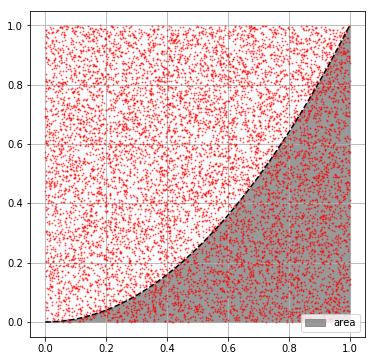

In [30]:
# 计算积分 y = x**2

n = 10000
# 投点次数

xmin,xmax = 0.0,1.0
ymin,ymax = 0.0,1.0

x = np.random.uniform(xmin,xmax,n)
y = np.random.uniform(ymin,ymax,n)

def f(x):
    return(x**2)

res = np.where(y < f(x),1,0).sum()
integral = res / n
print('integral: ',integral)
# 计算 定积分的近似值

fig = plt.figure(figsize = (6,6))
axes = fig.add_subplot(1,1,1)
axes.plot(x,y,'ro',markersize=1,alpha = 0.5)

xi = np.linspace(0,1,100)
yi = xi ** 2
plt.plot(xi,yi,'--k')
plt.fill_between(xi,yi,0,color = 'gray',alpha = 0.8,label = 'area')
plt.legend()
plt.grid()

第1个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 0.28031993928588017 0.28031993928588017 1.8141821400503924 2.0945020793362725 0.0
第2个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.5440948876097114 2.5440948876097114 1.0653346782549582 3.6094295658646693 0.0
第3个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.770937405884437 4.770937405884437 1.8091053125268317 6.580042718411269 0.0
第4个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 5.5178227974774785 6.580042718411269 2.691929901940852 9.27197262035212 1.0622199209337904
第5个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 5.891539032818889 9.27197262035212 1.7403118425913533 11.012284462943473 3.380433587533231
第6个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 6.534162547104945 11.012284462943473 1.048787396130917 12.06107185907439 4.478121915838528
第7个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 6.758822725730736 12.06107185907439 2.4547702129634983 14.515842072037888 5.302249133343654
第8个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 6.828427174715369 14.515842072037888 2.682010631819073 17.19785270385696 7.687414897322519
第9个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 6.845922

Text(0.5, 1.0, '蒙特卡罗模拟 - 排队上厕所问题')

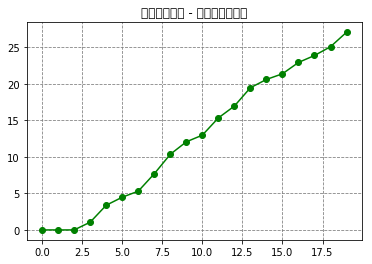

In [31]:
# 厕所排队问题
# 1、两场电影结束时间相隔较长，互不影响；
# 2、每场电影结束之后会有20个人想上厕所；
# 3、这20个人会在0到10分钟之内全部到达厕所）；
# 4、每个人上厕所时间在1-3分钟之间
# 首先模拟最简单的情况，也就是厕所只有一个位置，不考虑两人共用的情况,则每人必须等上一人出恭完毕方可进行。
# 分析：对于每个人都有如下几个参数：
# 到达时间 / 等待时间 / 开始上厕所时间 / 结束时间

arrivingtime = np.random.uniform(0,10,20)
arrivingtime.sort()
workingtime = np.random.uniform(1,3,20)
# np.random.uniform 随机数：均匀分布的样本值

startingtime = [0 for i in range(20)]
finishtime = [0 for i in range(20)]
waitingtime = [0 for i in range(20)]
emptytime = [0 for i in range(20)]
# 开始时间都是0

startingtime[0] = arrivingtime[0]       # 第一个人之前没有人，所以开始时间 = 到达时间
finishtime[0] = startingtime[0] + workingtime[0]     # 第一个人完成时间 = 开始时间 + “工作”时间
waitingtime[0] = startingtime[0] - arrivingtime[0]      # 第一个人不用等待

for i in range(len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:
        startingtime[i] = finishtime[i-1]
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishtime[i-1]
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
    print('第%d个人：到达时间 开始时间 “工作”时间 完成时间 等待时间\n' %(i+1),
          arrivingtime[i],
          startingtime[i],
          workingtime[i],
          finishtime[i],
          waitingtime[i])
print('arerage waiting time is %f' %np.mean(waitingtime))
print('------')
# 判断：如果下一个人在上一个人完成之前到达，则 开始时间 = 上一个人完成时间，
# 否则 开始时间 = 到达时间，且存在空闲时间 = 到达时间 - 上一个人完成时间
fig = plt.figure(figsize = (6,4))
plt.plot(waitingtime, '-go')
plt.grid(True,linestyle='--', color = 'gray',linewidth = '0.8')
plt.title('蒙特卡罗模拟 - 排队上厕所问题')

# 图表绘制